In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error
import wrangle

# Acquire and Prepare

In [2]:
# Acquire data and assign them a variable name
cpi_less_food_energy, cpi_rate, monetary_base, m2, personal_savings_rate, unemployment_rate, workforce_participation_rate = wrangle.acquire_inflation()

In [3]:
# Prepare the data, change column names, make DATE column a datetime format. Full description can be found in wrangle.py file.
wrangle.prep_inflation(cpi_less_food_energy, cpi_rate, monetary_base, m2, personal_savings_rate, unemployment_rate, workforce_participation_rate)

In [7]:
# Assign the DataFrame to df.
df = wrangle.make_df(cpi_less_food_energy, cpi_rate, monetary_base, m2, personal_savings_rate, unemployment_rate, workforce_participation_rate)

In [8]:
df.head()

,workforce_participation_rate,unemployment_rate,personal_savings_rate,m2,cpi_rate,cpi_less_food_energy,monetary_base_total,monetary_base_total_balances_maintained,circulation
DATE,,,,,,,,,
1960-01-01,57.9,6.1,10.9,301.5,1.034483,30.5,50661,18537,32123
1960-02-01,58.1,5.7,10.6,298.5,1.730104,30.6,49609,17948,31661
1960-03-01,58.0,6.1,9.4,298.2,1.730104,30.6,49482,17776,31706
1960-04-01,59.1,5.2,8.4,300.3,1.724138,30.6,49656,17864,31792
1960-05-01,59.6,4.8,10.4,298.9,1.724138,30.6,49734,17939,31795


# Explore

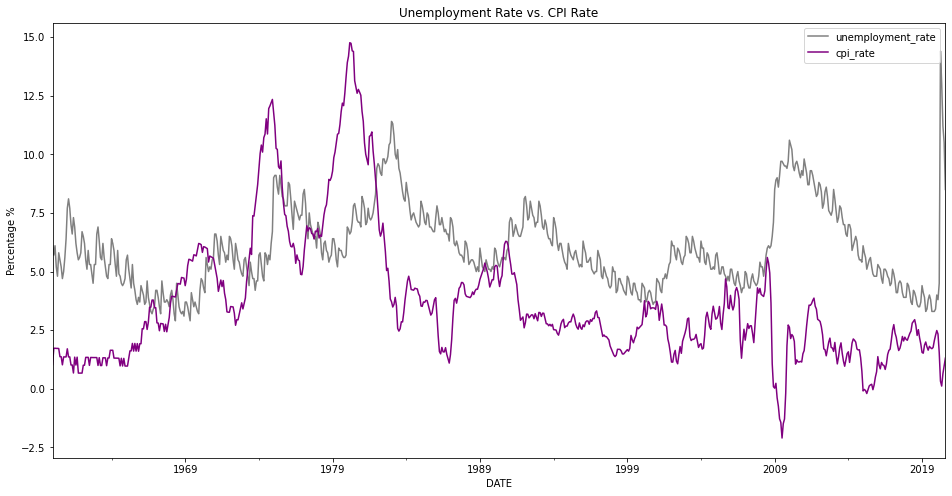

In [9]:
# A graph which compares Unemployment Rate and CPI rate
plt.figure(figsize=(16,8))
plt.title('Unemployment Rate vs. CPI Rate')
df.unemployment_rate.plot(c='grey')
df.cpi_rate.plot(c='purple')
plt.ylabel('Percentage %')
plt.legend()
plt.show()

Visually, it does appear like there could be some sort of relationship between unemployment rate and CPI rate. Further statistical analysis is necessary.

### Null Hypothesis:
- There is no significant relationship between unemployment rate and CPI rate. 

### Alternative Hypothesis:
- There is a statistically significant relationship between unemployment rate and CPI rate. 

In [10]:
corr, p = stats.pearsonr(df.unemployment_rate, df.cpi_rate)
corr, p

(0.10643464852944068, 0.004040284551800222)

Based on the statistical test I can see there is a very weak positive correlation between the two variables. This relationship is weak enough for me to say that I cannot reject the Null Hypothesis. 

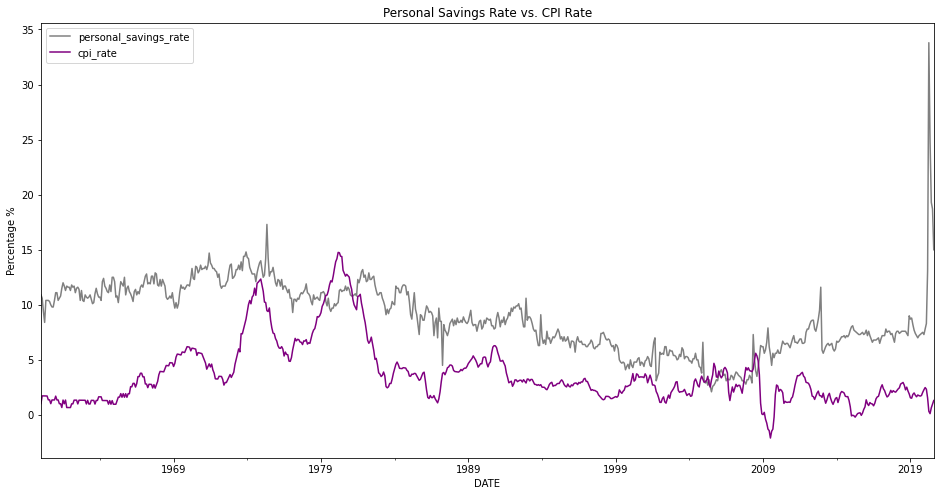

In [11]:
# A graph which compares Person Savings Rate and CPI rate
plt.figure(figsize=(16,8))
plt.title('Personal Savings Rate vs. CPI Rate')
df.personal_savings_rate.plot(c='grey')
df.cpi_rate.plot(c='purple')
plt.ylabel('Percentage %')
plt.legend()
plt.show()

As with the previous chart, there appears to potentially be some sort of relationship going on here, but a statistical test is definitely necessary.

### Null Hypothesis:
- There is no significant relationship between Personal Savings Rate and CPI Rate.

### Alternative Hypothesis
- There is a statistically significant relationship between Personal Savings Rate and CPI Rate. 

In [12]:
corr, p = stats.pearsonr(df.personal_savings_rate, df.cpi_rate)
corr, p

(0.3657128668152618, 1.860566258266929e-24)

The results of the test show a slightly stronger positive correlation between these two than the previous test. However, that relationship is still overall pretty weak, and I believe it leads me to not reject the Null Hypothesis.

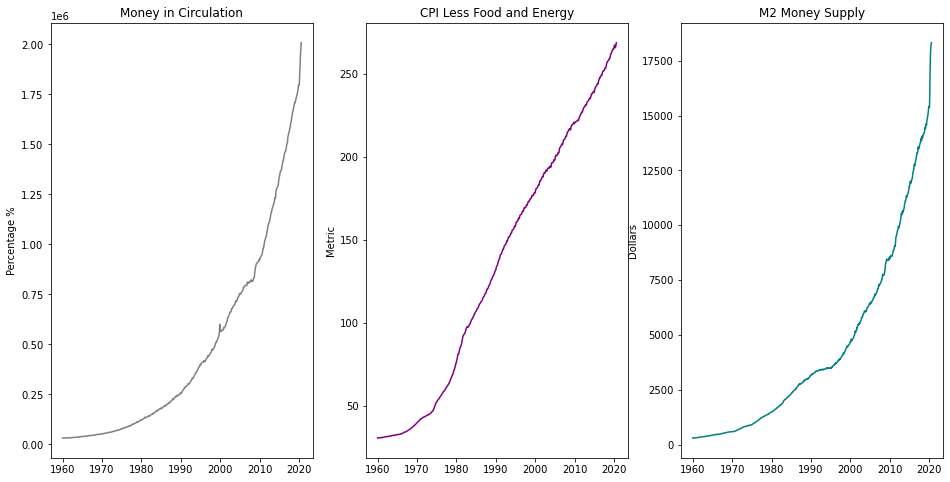

In [13]:
# Graphs which compare Money in Circulation, CPI, and M2 Money Supply.
plt.figure(figsize=(16,8))
plt.subplot(1, 3, 1)
plt.plot(df.circulation, c='grey')
plt.title('Money in Circulation')
plt.ylabel('Percentage %')


plt.subplot(1, 3, 2)
plt.plot(df.cpi_less_food_energy, c='purple')
plt.title('CPI Less Food and Energy')
plt.ylabel('Metric')

plt.subplot(1, 3, 3)
plt.plot(df.m2, c='teal')
plt.title('M2 Money Supply')
plt.ylabel('Dollars')
plt.show()

### Null Hypothesis:
- There is no significant relationship between Money in Circulation and CPI.

### Alternative Hypothesis
- There is a statistically significant relationship between money in Circulation and CPI. 

In [14]:
corr, p = stats.pearsonr(df.circulation, df.cpi_less_food_energy)
corr, p

(0.9168885708062409, 8.480240839473617e-292)

### Null Hypothesis:
- There is no significant relationship between M2 money supply and CPI.

### Alternative Hypothesis
- There is a statistically significant relationship between M2 money supply and CPI. 

In [15]:
corr, p = stats.pearsonr(df.m2, df.cpi_less_food_energy)
corr, p

(0.9226720279260885, 1.0714073823741931e-302)

There is an extremely significant positive correlation between both money in circulation and M2 money supply and CPI metric, therefore I reject the Null Hypothesis.

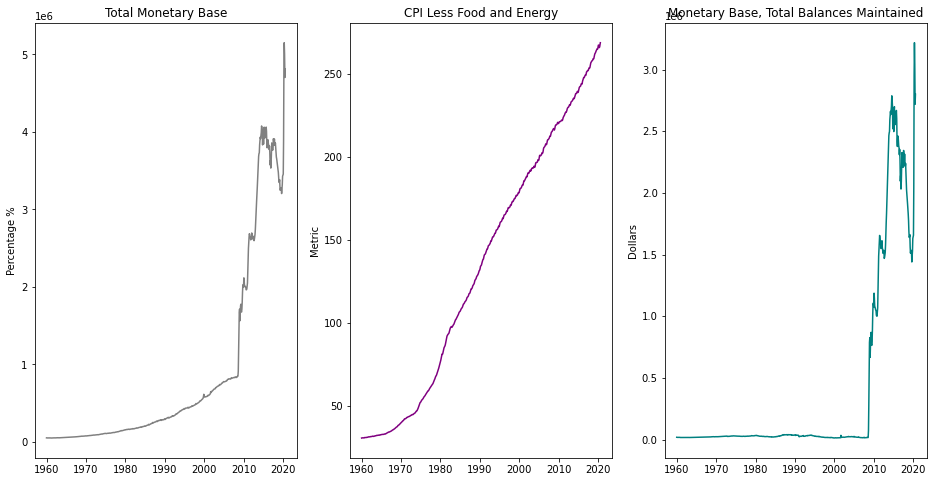

In [16]:
# Graphs which compare Total Monetary Base, CPI, and Monetary Base, Total Balances Maintained.
plt.figure(figsize=(16,8))
plt.subplot(1, 3, 1)
plt.plot(df.monetary_base_total, c='grey')
plt.title('Total Monetary Base')
plt.ylabel('Percentage %')


plt.subplot(1, 3, 2)
plt.plot(df.cpi_less_food_energy, c='purple')
plt.title('CPI Less Food and Energy')
plt.ylabel('Metric')

plt.subplot(1, 3, 3)
plt.plot(df.monetary_base_total_balances_maintained, c='teal')
plt.title('Monetary Base, Total Balances Maintained')
plt.ylabel('Dollars')
plt.show()

It appears there could be a slight relationship here. Statistical analysis is required.

### Null Hypothesis:
- There is no significant relationship between Total Monetary Base and CPI.

### Alternative Hypothesis
- There is a statistically significant relationship between Total Monetary Base and CPI. 

In [18]:
corr, p = stats.pearsonr(df.monetary_base_total, df.cpi_less_food_energy)
corr, p

(0.7871467839581123, 1.5928718300040356e-154)

### Null Hypothesis:
- There is no significant relationship between Monetary Supply, Total Balances Maintained and CPI.

### Alternative Hypothesis
- There is a statistically significant relationship between Monetary Supply, Total Balances Maintained and CPI.

In [19]:
corr, p = stats.pearsonr(df.monetary_base_total_balances_maintained, df.cpi_less_food_energy)
corr, p

(0.6591203526986482, 6.330642380826787e-92)

There are statistically significant positive correlations between Total Monetary Base/Monetary Base, total balances maintained and CPI Metric. I reject the Negative Hypothesis for both variables. 

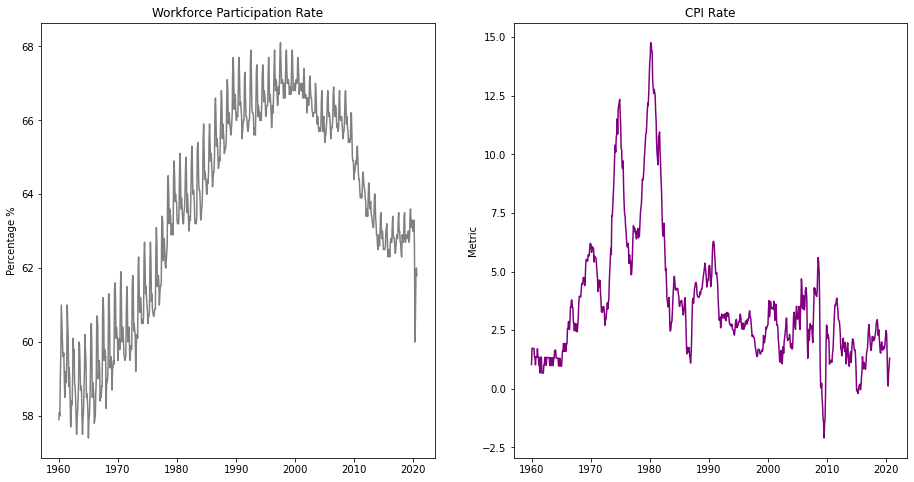

In [50]:
# Graphs which compare Workforce Participation Rate and CPI
plt.figure(figsize=(24,8))
plt.subplot(1, 3, 1)
plt.plot(df.workforce_participation_rate, c='grey')
plt.title('Workforce Participation Rate')
plt.ylabel('Percentage %')


plt.subplot(1, 3, 2)
plt.plot(df.cpi_rate, c='purple')
plt.title('CPI Rate')
plt.ylabel('Metric')

plt.show()

It appears like there could be a slight relationship between Wokforce PArticipation Rate and CPI Rate.

### Null Hypothesis:
- There is no significant relationship between Workforce Particiation Rate and CPI Rate.

### Alternative Hypothesis
- There is a statistically significant relationship between Workforce Participation Rate and CPI Rate.

In [51]:
corr, p = stats.pearsonr(df.workforce_participation_rate, df.cpi_rate)
corr, p

(-0.04461117765872274, 0.22928389717680572)

There is a statistically a near zero relationship between Workforce Participation Rate and CPI rate, although the p value is not low enough to give me confidence in making a determination one way or the other. I do not draw any conclusions from these two variables.

### Exploration Takeaway

In my exploration process I sought to find variables which have a relationship with the target variables (CPI Rate, CPI Metric). I wanted to see which variables had the strongest relationship to halp me get ready for modeling and to build a foundation of knowledge which can be built upon in future analyses. During my exploration I found that Money in Circulation and M2 money supply were highly correlated with CPI Metric. My efforts to find strong relationships with CPI Rate was less fruitful. However, I believe if I can accurately predict the CPI Metric value then I can simply find the rate of change myself and predict it as well. I just wouldn't directly be predicting it. Overall, I certainly would like to find and look at more variables and prehaps create some new variables based on ones I already have. Considering the time restraint, I will move forward with completing the MVP from here. 

# Model

In [23]:
# Specify the size of train, validate, and test
train_size = int(len(df) * .6)
validate_size = int(len(df) * .2)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

print(train.shape, validate.shape, test.shape)

(436, 9) (145, 9) (147, 9)


In [24]:
# evaluate will return the RMSE for the particular model and target variable
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

# plot_and_eval will plot the data alongside the predictions and display the result in terms of RMSE
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
    
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'cpi_less_food_energy', 'rmse_1', 'cpi_rate', 'rmse_2'])

# append_eval_df which store the performance of each model on each target variable for ease of comparison
def append_eval_df(model_type, target_var, target_var_2):
    rmse_1 = evaluate(target_var)
    rmse_2 = evaluate(target_var_2)
    d = {'model_type': [model_type], 'cpi_less_food_energy': [target_var], 'rmse_1': [rmse_1], 'cpi_rate': [target_var_2], 'rmse_2': rmse_2}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Last Observed Value

In [25]:
# assign values that were observed last
cpi_rate = round(train['cpi_rate'][-1],2)
cpi_metric = round(train['cpi_less_food_energy'][-1],2)

# create dataframe with last observed values
yhat_df = pd.DataFrame({'cpi_rate': [cpi_rate], 'cpi_less_food_energy': [cpi_metric]}, 
                       index = validate.index)

yhat_df.head(3)

,cpi_rate,cpi_less_food_energy
DATE,,
1996-05-01,2.9,165.0
1996-06-01,2.9,165.0
1996-07-01,2.9,165.0


cpi_less_food_energy -- RMSE: 28


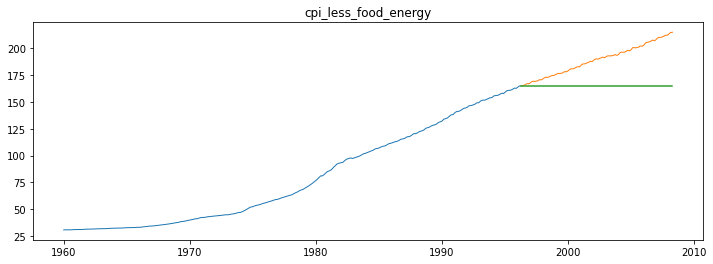

In [26]:
plot_and_eval('cpi_less_food_energy')

cpi_rate -- RMSE: 1


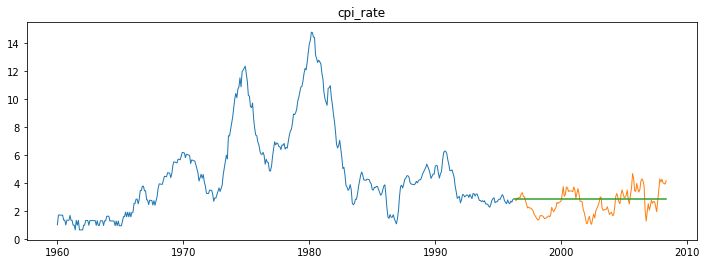

In [27]:
plot_and_eval('cpi_rate')

In [28]:
# place model performance in tracking dataframe
eval_df = append_eval_df('last_observed_value', 'cpi_less_food_energy', 'cpi_rate')
eval_df

,model_type,cpi_less_food_energy,rmse_1,cpi_rate,rmse_2
0,last_observed_value,cpi_less_food_energy,28.0,cpi_rate,1.0


### Simple Average

In [29]:
# assign values for simple avg
cpi_metric = round(train['cpi_less_food_energy'].mean(), 2)
cpi_rate = round(train['cpi_rate'].mean(), 2)

# create dataframe with these values
yhat_df = pd.DataFrame({'cpi_less_food_energy': [cpi_metric],
                            'cpi_rate': [cpi_rate],
                           }, index = validate.index)

yhat_df.head(3)

,cpi_less_food_energy,cpi_rate
DATE,,
1996-05-01,79.21,4.73
1996-06-01,79.21,4.73
1996-07-01,79.21,4.73


cpi_less_food_energy -- RMSE: 111


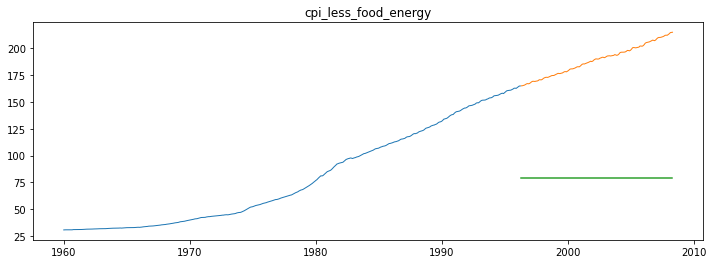

In [30]:
plot_and_eval('cpi_less_food_energy')

cpi_rate -- RMSE: 2


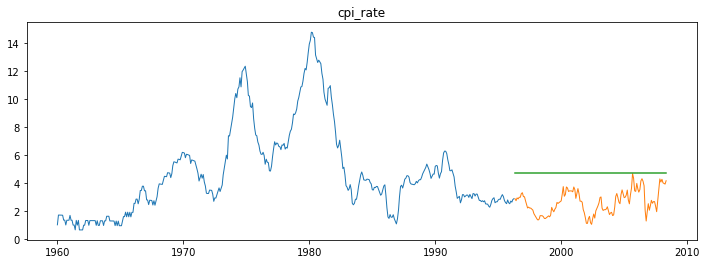

In [31]:
plot_and_eval('cpi_rate')

In [32]:
# place model performance in tracking dataframe
eval_df = append_eval_df('simple_avg', 'cpi_less_food_energy', 'cpi_rate')
eval_df

,model_type,cpi_less_food_energy,rmse_1,cpi_rate,rmse_2
0,last_observed_value,cpi_less_food_energy,28.0,cpi_rate,1.0
1,simple_avg,cpi_less_food_energy,111.0,cpi_rate,2.0


### Baseline 
I will be considering the Simple Average model as my Baseline.

### Moving Average

In [33]:
# assign period of 3, representing one fiscal quarter
period = 3

# assign values for moving avg
cpi_metric = round(train['cpi_less_food_energy'].rolling(period).mean().iloc[-1], 2)
cpi_rate = round(train['cpi_rate'].rolling(period).mean().iloc[-1], 2)

# create dataframe with these values
yhat_df = pd.DataFrame({'cpi_less_food_energy': [cpi_metric],
                            'cpi_rate': [cpi_rate],
                           }, index = validate.index)
yhat_df.head(2)

,cpi_less_food_energy,cpi_rate
DATE,,
1996-05-01,164.7,2.8
1996-06-01,164.7,2.8


cpi_less_food_energy -- RMSE: 28


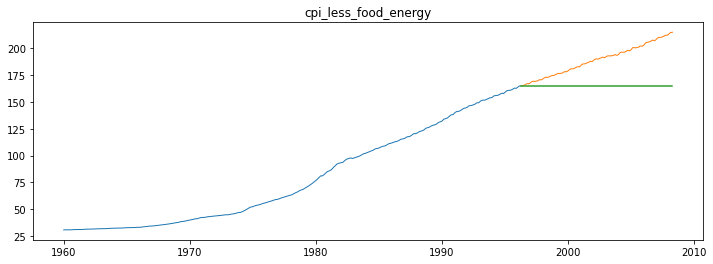

In [34]:
plot_and_eval('cpi_less_food_energy')

cpi_rate -- RMSE: 1


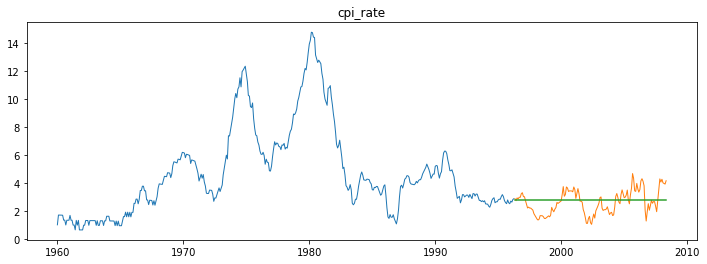

In [35]:
plot_and_eval('cpi_rate')

In [36]:
# place model performance in tracking dataframe
eval_df = append_eval_df('moving_avg', 'cpi_less_food_energy', 'cpi_rate')
eval_df

,model_type,cpi_less_food_energy,rmse_1,cpi_rate,rmse_2
0,last_observed_value,cpi_less_food_energy,28.0,cpi_rate,1.0
1,simple_avg,cpi_less_food_energy,111.0,cpi_rate,2.0
2,moving_avg,cpi_less_food_energy,28.0,cpi_rate,1.0


### Holt Linear Trend

In [38]:
# model is for CPI
from statsmodels.tsa.api import Holt
# learn and fit Holt algorithm to train data
model = Holt(train['cpi_less_food_energy'], exponential = False)
model = model.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)

# make predictions
yhat_items = model.predict(start = validate.index[0], 
                            end = validate.index[-1])

# create dataframe 
yhat_df['cpi_less_food_energy'] = round(yhat_items, 2)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
# model2 is for CPI rate
# learn and fit Holt algorithm to train data
model2 = Holt(train['cpi_rate'], exponential = False)
model2 = model2.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)

# make predictions
yhat_items2 = model2.predict(start = validate.index[0], 
                            end = validate.index[-1])

# create dataframe
yhat_df['cpi_rate'] = round(yhat_items2, 2)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


cpi_less_food_energy -- RMSE: 4


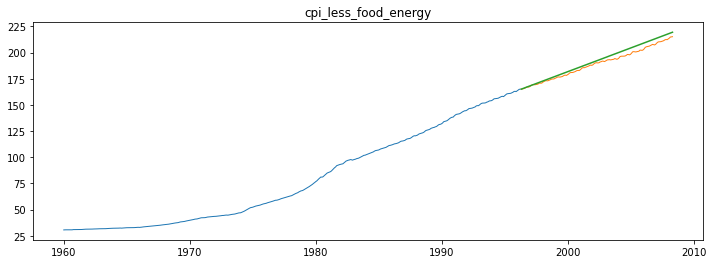

In [40]:
plot_and_eval('cpi_less_food_energy')

cpi_rate -- RMSE: 2


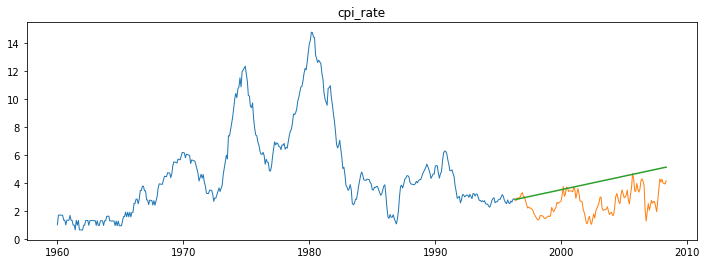

In [41]:
plot_and_eval('cpi_rate')

In [42]:
# place model performance in tracking dataframe
eval_df = append_eval_df('holt', 'cpi_less_food_energy', 'cpi_rate')
eval_df

,model_type,cpi_less_food_energy,rmse_1,cpi_rate,rmse_2
0,last_observed_value,cpi_less_food_energy,28.0,cpi_rate,1.0
1,simple_avg,cpi_less_food_energy,111.0,cpi_rate,2.0
2,moving_avg,cpi_less_food_energy,28.0,cpi_rate,1.0
3,holt,cpi_less_food_energy,4.0,cpi_rate,2.0


### Performace so far:

Best cpi_less_food_energy is holt.

Best cpi_rate is moving average closing followed by holt. 

Due to this, I will be running the holt model on the Test data. 

### Test

In [43]:
# combine train and validate into single dataframe
train_validate = train.append(validate)
train_validate.head()

,workforce_participation_rate,unemployment_rate,personal_savings_rate,m2,cpi_rate,cpi_less_food_energy,monetary_base_total,monetary_base_total_balances_maintained,circulation
DATE,,,,,,,,,
1960-01-01,57.9,6.1,10.9,301.5,1.034483,30.5,50661,18537,32123
1960-02-01,58.1,5.7,10.6,298.5,1.730104,30.6,49609,17948,31661
1960-03-01,58.0,6.1,9.4,298.2,1.730104,30.6,49482,17776,31706
1960-04-01,59.1,5.2,8.4,300.3,1.724138,30.6,49656,17864,31792
1960-05-01,59.6,4.8,10.4,298.9,1.724138,30.6,49734,17939,31795


I will be using Train and Validate to predict for Test.

In [44]:
# create dataframe
yhat_df = pd.DataFrame({'cpi_rate': [cpi_rate], 'cpi_less_food_energy': [cpi_metric]}, 
                       index = test.index)

# learn and fit algorithm to train_validate
model = Holt(train_validate['cpi_less_food_energy'], exponential = False)
model = model.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)

# make predictions
yhat_items = model.predict(start = test.index[0], 
                            end = test.index[-1])

# place predictions in dataframe
yhat_df['cpi_less_food_energy'] = round(yhat_items, 2)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
# learn and fit algorithm to train_validate
model2 = Holt(train_validate['cpi_rate'], exponential = False)
model2 = model2.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)

# make predictions
yhat_items2 = model2.predict(start = test.index[0], 
                            end = test.index[-1])

# plave predictions in dataframe
yhat_df['cpi_rate'] = round(yhat_items2, 2)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
# tweak functions to work with test data
def evaluate_test(target_var):
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse


def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train_validate[target_var], label = 'Train_validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate_test(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

cpi_less_food_energy -- RMSE: 8


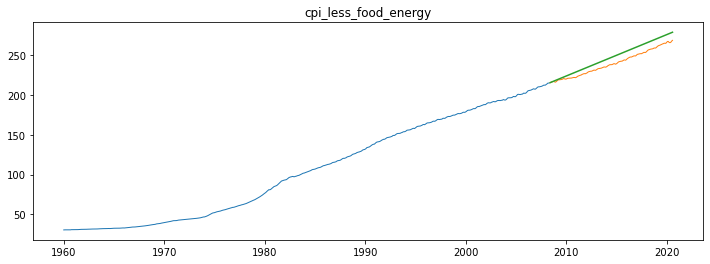

In [47]:
plot_and_eval_test('cpi_less_food_energy')

cpi_rate -- RMSE: 4


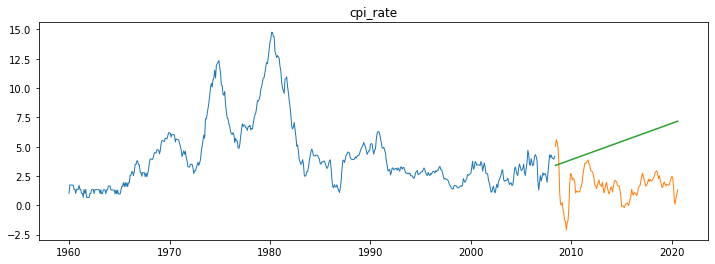

In [48]:
plot_and_eval_test('cpi_rate')

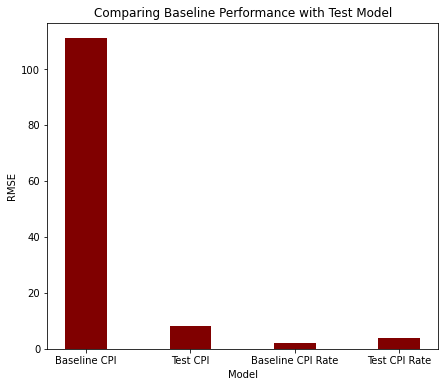

In [57]:
# A chart which compares model performances of Baseline model and Test model
y = [111, 8, 2, 4]
x = ['Baseline CPI', 'Test CPI', 'Baseline CPI Rate', 'Test CPI Rate']

fig = plt.figure(figsize = (7, 6))

plt.bar(x, y, color ='maroon', width = 0.4)

plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Comparing Baseline Performance with Test Model")
plt.show()

The above chart shows the Baseline Model compared with the Test Model. These were two different models that were fitted to slightly different data. However, it can still be useful to see that the particular model ran on test looks to be a much better performer than the Baseline model. Whereas the Baseline model slightly outperformed the test model on CPI Rate. 

# Conclusion

## Exploration
1. I found a slight positive correlation between Personl Savings Rate and CPI Rate.
2. I found a strong positive correlation between M2 Money Supply, Money in Circulation, and CPI.
3. I found a positive correlation between Total Monetary Base, Monetary Base (Total Balances Maintained), and CPI.

## Takeaway: 
Knowing which indicators most correlate with CPI Rate and CPI will assist anyone involved in Macroeconomic Analysis, specifically when they are trying to factor in or anticipate rising consumer prices.

## Next Steps:
Some continuations of this project that I could do are:
1. Bring in more economic indicators.
2. Create new indicators using the ones I already have. 
3. Use the data to create Regression Models.
4. Work with Weekly data.
5. Change hyperparameters for models.